<h1>Exploratory Data Analysis</h1>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Importing the dataset and seeing the surface</h2>
In dataset, samples are ordered by first feature; shuffling them to discard any undesired outcome that might arise while developing the model

In [8]:
data = pd.read_csv('test_scores.csv')
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,QOQTS,Urban,Public,RK7,Standard,22.0,0MXW8,Male,Does not qualify,53.0,58.0
1,VKWQH,Rural,Public,D33,Standard,21.0,OD271,Male,Does not qualify,66.0,78.0
2,KZKKE,Rural,Public,5JK,Standard,24.0,8Q0G9,Female,Qualifies for reduced/free lunch,33.0,39.0
3,QOQTS,Urban,Public,0N7,Experimental,28.0,JVF58,Female,Does not qualify,43.0,59.0
4,VVTVA,Urban,Public,TB5,Standard,25.0,G5H8L,Female,Qualifies for reduced/free lunch,39.0,54.0


Let's explore the features and examine some aspects of the categories that are notable

In [9]:
data.school_setting.unique()

array(['Urban', 'Rural', 'Suburban'], dtype=object)

In [10]:
data.school_type.unique()

array(['Public', 'Non-public'], dtype=object)

In [11]:
data.teaching_method.unique()

array(['Standard', 'Experimental'], dtype=object)

In [12]:
data.gender.unique()

array(['Male', 'Female'], dtype=object)

In [13]:
data.lunch.unique()

array(['Does not qualify', 'Qualifies for reduced/free lunch'],
      dtype=object)

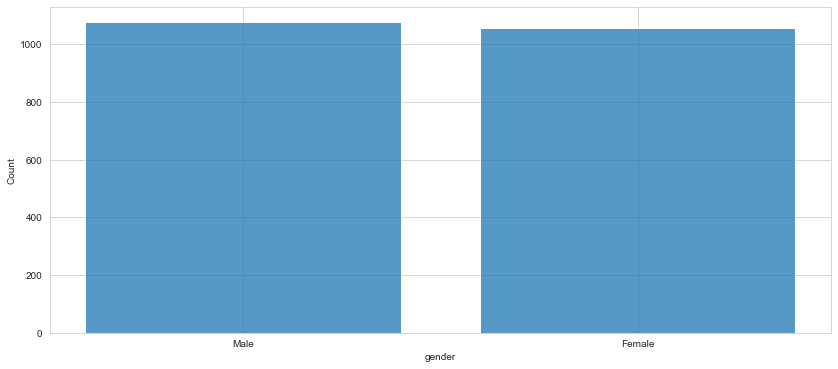

In [53]:
sns.set_style('whitegrid')
plt.subplots(figsize=(14, 6))
sns.histplot(data, x="gender", shrink=0.8)

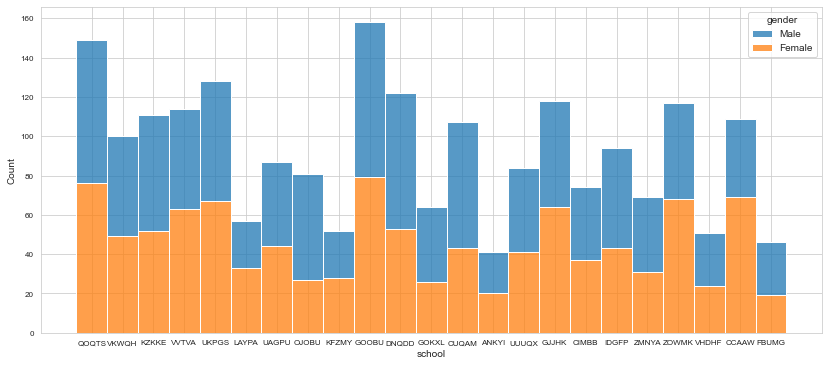

In [59]:
plt.subplots(figsize=(14, 6))
sns.histplot(data, x='school', hue="gender", multiple="stack").tick_params(labelsize=8.1)

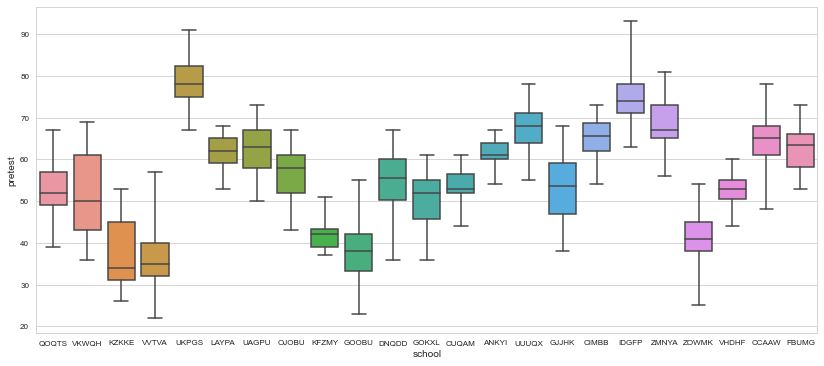

In [60]:
plt.subplots(figsize=(14, 6))
sns.boxplot(data=data, x="school", y="pretest", whis=np.inf).tick_params(labelsize=8.1)

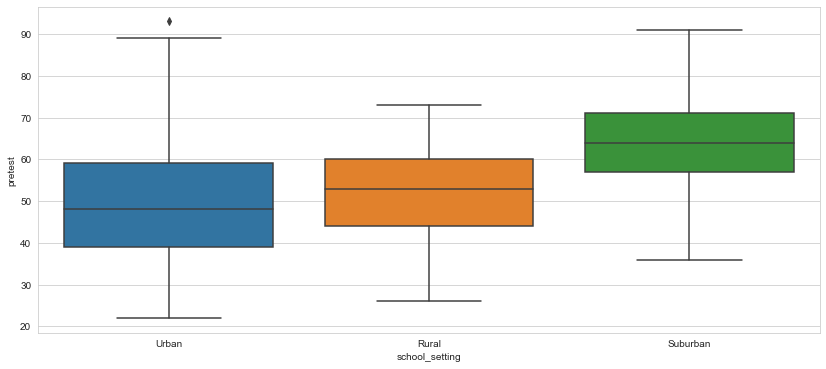

In [56]:
plt.subplots(figsize=(14, 6))
sns.boxplot(data=data,x="school_setting",y="pretest")

Students in suburban schools have better pretest scores (and this inference doesn't seem to be biased by population sizes)

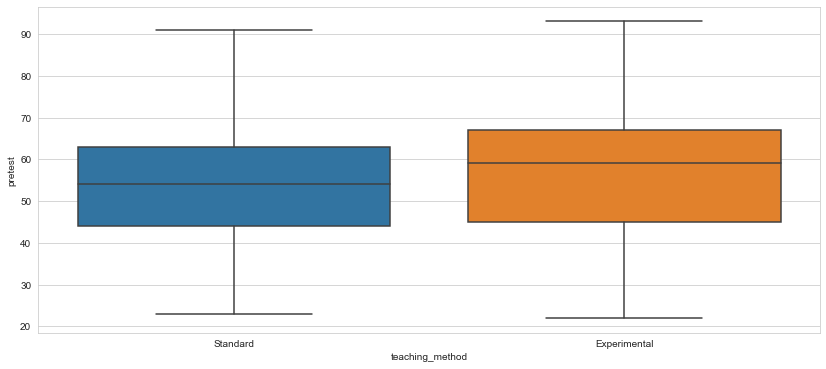

In [33]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data,x="teaching_method",y="pretest")

Experimental teaching method gives slightly better results

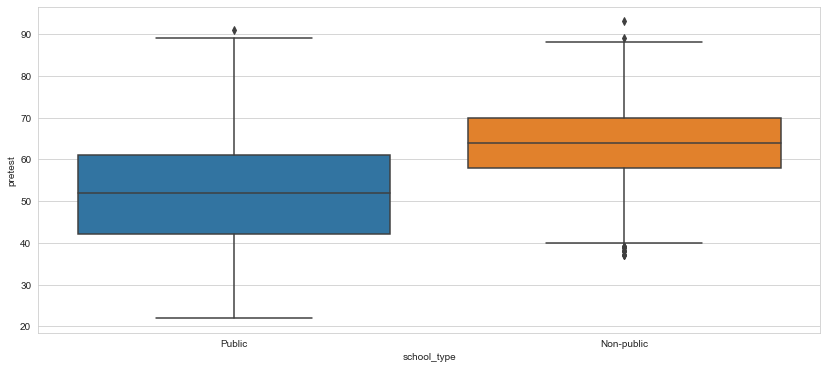

In [35]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data,x="school_type",y="pretest")

Descriptive statistics of numeric data and correlation

In [192]:
data.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [193]:
correlation = data.corr()
correlation

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000


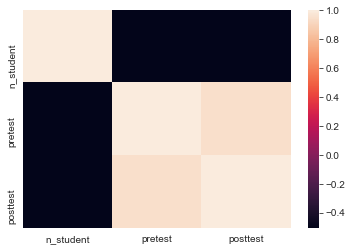

In [194]:
sns.heatmap(correlation)

<h1>Preprocessing</h1>

As student_id is unique for every sample, it has no contribution for estimation

In [62]:
data.drop(['student_id'], axis=1, inplace=True)

Encoding categorical data and feature scaling numeric data

In [63]:
featuresToEncode = ['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'gender', 'lunch']
featuresToScale = ['n_student','pretest']

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in featuresToEncode:
    data[feature] = le.fit_transform(data[feature])
data

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,14,2,1,70,1,22.0,1,0,53.0,58.0
1,19,0,1,35,1,21.0,1,0,66.0,78.0
2,11,0,1,17,1,24.0,0,1,33.0,39.0
3,14,2,1,2,0,28.0,0,0,43.0,59.0
4,20,2,1,76,1,25.0,0,1,39.0,54.0
...,...,...,...,...,...,...,...,...,...,...
2128,16,1,1,63,0,23.0,0,0,74.0,90.0
2129,19,0,1,47,0,22.0,1,0,40.0,55.0
2130,2,2,0,37,1,21.0,1,0,70.0,76.0
2131,11,0,1,68,1,23.0,1,1,32.0,41.0


In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
featuresScaled = pd.DataFrame(scaler.fit_transform(data[featuresToScale]),columns=featuresToScale)
featuresScaled.describe()

,n_student,pretest
count,2133.000000,2133.000000
mean,0.517443,0.464168
std,0.248758,0.191030
min,0.000000,0.000000
25%,0.352941,0.309859
50%,0.470588,0.478873
75%,0.764706,0.605634
max,1.000000,1.000000


In [69]:
data_noscaling = data
data[featuresToScale] = featuresScaled
data

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,14,2,1,70,1,0.470588,1,0,0.436620,58.0
1,19,0,1,35,1,0.411765,1,0,0.619718,78.0
2,11,0,1,17,1,0.588235,0,1,0.154930,39.0
3,14,2,1,2,0,0.823529,0,0,0.295775,59.0
4,20,2,1,76,1,0.647059,0,1,0.239437,54.0
...,...,...,...,...,...,...,...,...,...,...
2128,16,1,1,63,0,0.529412,0,0,0.732394,90.0
2129,19,0,1,47,0,0.470588,1,0,0.253521,55.0
2130,2,2,0,37,1,0.411765,1,0,0.676056,76.0
2131,11,0,1,68,1,0.529412,1,1,0.140845,41.0


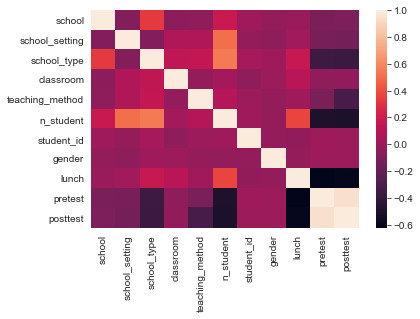

In [199]:
sns.heatmap(data.corr())

<h1>Building Model</h1>

In [70]:
X = data.drop('posttest', axis=1)
y = data.posttest

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Let's use OLS as baseline model

In [80]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
lr = LinearRegression().fit(X_train, y_train)
lr_predtrain = lr.predict(X_train)
lr_predtest = lr.predict(X_test)
r2_score(lr_predtrain, y_train), r2_score(lr_predtest, y_test)

(0.9441158547540365, 0.9445897425563988)

In [104]:
lr.coef_, lr.intercept_

(array([-2.21228230e-02, -8.66388720e-04,  8.22193384e-02,  1.50595972e-03,
        -6.03446817e+00, -1.74478429e+00, -6.98582560e-02, -6.82608379e-01,
         6.56480010e+01]),
 41.86151256046749)

We got pretty decent scores, but linear regression (OLS) underfits the data. We need an algorithm that can build a more complex model. First, let's see the results of K-Nearest Neighbors

In [86]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor().fit(X_train, y_train)
knn_predtrain = knn.predict(X_train)
knn_predtest = knn.predict(X_test)
r2_score(knn_predtrain, y_train), r2_score(knn_predtest, y_test)

(0.9620125231919194, 0.9481949080869599)

In [103]:
knn7 = KNeighborsRegressor(n_neighbors=7).fit(X_train, y_train)
knn7_predtrain = knn7.predict(X_train)
knn7_predtest = knn7.predict(X_test)
r2_score(knn7_predtrain, y_train), r2_score(knn7_predtest, y_test)

(0.9576521610900981, 0.94994183628253)

KNN extrapolates new data slightly better. Now, to create a more complex model, let's use MLP and tune hyper-parameters